# QF600 Assignment 2

###### Prepared By:
Gabriel Woon

# Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression

# Import Data

In [2]:
data_ind_raw = pd.read_excel('Industry_Portfolios.xlsx')
data_ind = data_ind_raw.drop("Date", axis = 1)
data_mkt_raw = pd.read_excel('Market_Portfolio.xlsx')
data_mkt = data_mkt_raw.drop("Date", axis = 1)

# Market Model (MM)

In [3]:
# risk-free rate
Rf = 0.13

In [4]:
# industry excess returns (y variable)
ind_excess = np.array(data_ind) - Rf

In [5]:
# market excess returns (x variable)
mkt_excess = np.array(data_mkt) - Rf

In [6]:
# market model regression
MM = LinearRegression().fit(mkt_excess ,ind_excess)
MM_alpha = MM.intercept_
MM_beta = MM.coef_

In [7]:
# market model coefficients
MM_coefficient = pd.DataFrame(np.concatenate((MM_alpha.reshape(1,10),MM_beta.reshape(1,10))),
                              index = ['Intercept (α)','Slope (β)'],
                              columns = data_ind.columns)
MM_coefficient

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Intercept (α),0.369443,-0.415599,0.159771,0.501719,-0.064020,0.194691,0.275492,0.237841,0.444585,-0.387135
Slope (β),0.652647,1.648536,1.169846,0.969850,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309


# Capital Asset Pricing Model (CAPM)

In [8]:
# merge data
data_merge = data_ind_raw.merge(data_mkt_raw)
data_merge = data_merge.drop("Date", axis = 1)

# consolidated mean returns (y variable)
consolidated_return = data_merge.mean(); consolidated_return

NoDur     0.902833
Durbl     0.733333
Manuf     1.012833
Enrgy     1.231167
HiTec     0.766250
Telcm     0.881417
Shops     0.916333
Hlth      0.783833
Utils     0.907167
Other     0.489083
Market    0.748083
dtype: float64

In [9]:
# market covariance matrix 
consolidated_cov = data_merge.cov(); consolidated_cov["Market"]

NoDur     12.300096
Durbl     31.069071
Manuf     22.047469
Enrgy     18.278244
HiTec     21.352470
Telcm     16.975563
Shops     15.576461
Hlth      12.684344
Utils     10.141021
Other     22.753517
Market    18.846466
Name: Market, dtype: float64

In [10]:
# market variance
market_var = consolidated_cov.iloc[10,10]; market_var

18.84646604341736

In [11]:
# consolidated beta (x variable)
consolidated_beta = consolidated_cov["Market"]/market_var
consolidated_beta = pd.DataFrame(np.array(consolidated_beta),
                                 columns=['Beta (β)'], 
                                 index = data_merge.columns)
consolidated_beta

,Beta (β)
NoDur,0.652647
Durbl,1.648536
Manuf,1.169846
Enrgy,0.969850
HiTec,1.132969
Telcm,0.900729
Shops,0.826492
Hlth,0.673036
Utils,0.538086
Other,1.207309


In [12]:
# capital asset pricing model regression
CAPM = LinearRegression().fit(consolidated_beta, consolidated_return)
CAPM_alpha = CAPM.intercept_
CAPM_beta = CAPM.coef_[0]

In [13]:
# capital asset pricing model coefficients
CAPM_coefficient = pd.DataFrame((CAPM_alpha, CAPM_beta), 
                                columns=["CAPM"], 
                                index=["Intercept (α)", "Slope (β)"])
CAPM_coefficient

,CAPM
Intercept (α),1.032768
Slope (β),-0.185467


## Security Market Line (SML)

In [14]:
# security market line returns
SML_return = np.arange(0, 2.01 , 1); SML_return

array([0., 1., 2.])

In [15]:
#security market line beta
SML_beta = CAPM_alpha + CAPM_beta*SML_return; SML_beta

array([1.03276837, 0.84730091, 0.66183345])

## Plot the Security Market Line (SML)

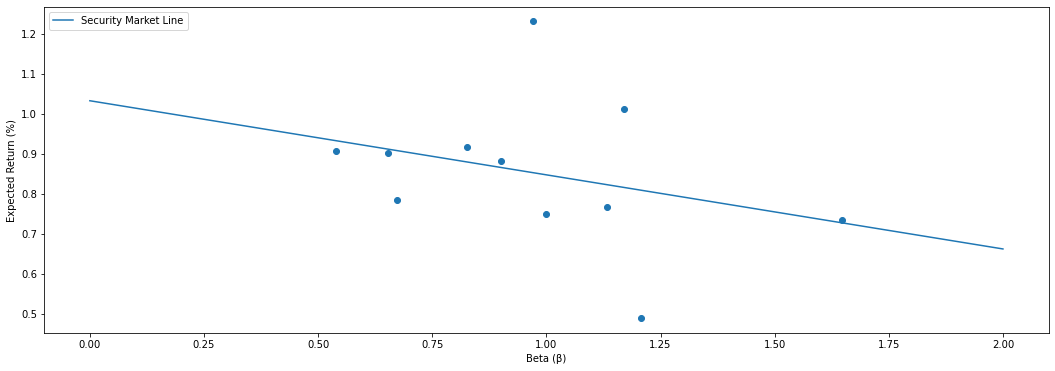

In [16]:
plt.figure(figsize = (18, 6))

plt.scatter(consolidated_beta, consolidated_return)
plt.plot(SML_return, SML_beta, label ='SML')

plt.ylabel('Expected Return (%)')
plt.xlabel('Beta (β)')
plt.legend(["Security Market Line"], loc=2)